In [1]:
import numpy as np
from scipy.interpolate import CubicSpline
from scipy import integrate, sparse
from scipy.stats import pearsonr
from scipy.sparse.linalg import eigs, ArpackNoConvergence
from scipy.sparse import coo_matrix
import math 
import networkx as nx
import itertools
import csv
import time
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [20, 5]
# Set seed for reproducibility
np.random.seed(1)
from math import comb
import h5py
from mpi4py import MPI
import traceback
import logging
import importlib
import pandas as pd

In [2]:
import sys
import os
sys.path.insert(0, os.path.abspath('/home/seyfdall/network_theory/rescomp/rescomp'))
import ResComp
import chaosode

In [3]:
sys.path.insert(0, os.path.abspath('/home/seyfdall/network_theory/Thinned_Rescomp/utils/'))
print(sys.path)
import helper
import driver

['/home/seyfdall/network_theory/Thinned_Rescomp/utils', '/home/seyfdall/network_theory/rescomp/rescomp', '/home/seyfdall/.conda/envs/reservoir/lib/python313.zip', '/home/seyfdall/.conda/envs/reservoir/lib/python3.13', '/home/seyfdall/.conda/envs/reservoir/lib/python3.13/lib-dynload', '', '/home/seyfdall/.conda/envs/reservoir/lib/python3.13/site-packages']


### Save Parameter Sets

In [5]:
# Reservoir Computing Parameters
parameters = {
    'n': [50],
    'erdos_renyi_c': [4],
    'gamma': [0.1,0.5,1,2,5,10,25,50],
    'sigma': [1e-3,5e-3,1e-2,5e-2,.14,.4,.7,1,10],
    'alpha': [1e-8,1e-6,1e-4,1e-2,1]
}

# Convert to a DataFrame
df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in parameters.items()]))
# Save to CSV
df.to_csv('./utils/param_sets/param_set_1', index=False)

In [8]:
df = pd.read_csv('./utils/param_sets/param_set_1')
param_dict = {col: df[col].dropna().tolist() for col in df.columns}
extra_dict = {
    'rhos': [1,2,3],
    'p_thin': [0.1,0.5,0.9]
}
combined_dict = param_dict | extra_dict
combined_dict

{'n': [50.0],
 'erdos_renyi_c': [4.0],
 'gamma': [0.1, 0.5, 1.0, 2.0, 5.0, 10.0, 25.0, 50.0],
 'sigma': [0.001, 0.005, 0.01, 0.05, 0.14, 0.4, 0.7, 1.0, 10.0],
 'alpha': [1e-08, 1e-06, 0.0001, 0.01, 1.0],
 'rhos': [1, 2, 3],
 'p_thin': [0.1, 0.5, 0.9]}

### Test File_io


In [ ]:
# import os
# os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"
import traceback
import importlib
import file_io
importlib.reload(file_io)

file_handler = file_io.HDF5FileHandler('/nobackup/autodelete/usr/seyfdall/network_theory/Thinned_Rescomp/results/gamma/16.0/param_set_1/', rho=2.0, p_thin=0.5)
try:
    file_handler.open_file('r')
    file_handler.load_attrs()
    print("Attributes", file_handler.attrs)

    print("Keys", file_handler.file.keys())
    print(f"Attribute Keys", file_handler.file.attrs.keys())
    group_handler = file_handler.get_group_handler(
        f"set_0", n=50, erdos_c=4, gamma=16.0, sigma=0.01, alpha=0.0
    )
    group_handler.load_data()
    print(group_handler.attrs)
    print(group_handler.datasets)
except Exception as e:
    traceback.print_exc()
    print(e)
finally:
    file_handler.close_file()

[Errno 2] Unable to synchronously open file (unable to open file: name = '/nobackup/autodelete/usr/seyfdall/network_theory/Thinned_Rescomp_results/gamma/15.0/param_set_1/_rho=2.0_p_thin=0.5.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)


Traceback (most recent call last):
  File "/tmp/ipykernel_2726184/1422705763.py", line 10, in <module>
    file_handler.open_file('r')
    ~~~~~~~~~~~~~~~~~~~~~~^^^^^
  File "/home/seyfdall/network_theory/Thinned_Rescomp/utils/file_io.py", line 55, in open_file
    self.file = h5py.File(self.file_path, mode)
                ~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "/home/seyfdall/.conda/envs/reservoir/lib/python3.13/site-packages/h5py/_hl/files.py", line 564, in __init__
    fid = make_fid(name, mode, userblock_size, fapl, fcpl, swmr=swmr)
  File "/home/seyfdall/.conda/envs/reservoir/lib/python3.13/site-packages/h5py/_hl/files.py", line 238, in make_fid
    fid = h5f.open(name, flags, fapl=fapl)
  File "h5py/_objects.pyx", line 56, in h5py._objects.with_phil.wrapper
  File "h5py/_objects.pyx", line 57, in h5py._objects.with_phil.wrapper
  File "h5py/h5f.pyx", line 102, in h5py.h5f.open
FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '/nobackup/

In [24]:
# Manually Run file_io

file_handler = file_io.HDF5FileHandler("./", rho=1.0, p_thin=0.0)
with file_handler:
    for i in range(5):
        if i > 3:
            # file_handler.save_attrs()
            # file_handler.close_file()
            break
        group_handler = file_handler.get_group_handler(f"set_{i}", n=40, erdos_c=4, gamma=15.0, sigma=2.0, alpha=1.0)
        attributes = {"test": 100.0}
        group_handler.add_attrs(**attributes)
        group_handler.save_data()
        group_handler.group.file.flush()
    


Save Data Function
n: 40
erdos_c: 4
gamma: 15.0
sigma: 2.0
alpha: 1.0
test: 100.0

Save Data Function - post clear
alpha: 1.0
erdos_c: 4
gamma: 15.0
n: 40
sigma: 2.0
test: 100.0




Save Data Function
n: 40
erdos_c: 4
gamma: 15.0
sigma: 2.0
alpha: 1.0
test: 100.0

Save Data Function - post clear
alpha: 1.0
erdos_c: 4
gamma: 15.0
n: 40
sigma: 2.0
test: 100.0




Save Data Function
n: 40
erdos_c: 4
gamma: 15.0
sigma: 2.0
alpha: 1.0
test: 100.0

Save Data Function - post clear
alpha: 1.0
erdos_c: 4
gamma: 15.0
n: 40
sigma: 2.0
test: 100.0




Save Data Function
n: 40
erdos_c: 4
gamma: 15.0
sigma: 2.0
alpha: 1.0
test: 100.0

Save Data Function - post clear
alpha: 1.0
erdos_c: 4
gamma: 15.0
n: 40
sigma: 2.0
test: 100.0





In [21]:
with h5py.File("_rho=1.0_p_thin=0.0.h5", 'r') as file:
    for group_name in file.keys():
        print(group_name)
        group = file[group_name]
        print(group.attrs['test'])

set_0_n=40_erdos_c=4_gamma=15.0_sigma=2.0_alpha=1.0
100.0
set_1_n=40_erdos_c=4_gamma=15.0_sigma=2.0_alpha=1.0
100.0
set_2_n=40_erdos_c=4_gamma=15.0_sigma=2.0_alpha=1.0
100.0
set_3_n=40_erdos_c=4_gamma=15.0_sigma=2.0_alpha=1.0
100.0


### Thinned Graph Structure

In [2]:
def erdos(n, mean_degree):
    """ Erdos-Renyi random graph.
        Parameters
            mean_degree (int): average edges per node. Must be an even integer
            n (int): Number of nodes in the network
        Returns
            A (csc sparse matrix): Adjacency matrix of the network
    """
    p = mean_degree/n
    A = nx.adjacency_matrix(nx.erdos_renyi_graph(n,p)).T
    return A

Number of strongly connected components: 448
Sizes of SCCs: [1 2 3 5]


(array([409.,  30.,   9.]),
 array([1., 2., 3., 5.]),
 <BarContainer object of 3 artists>)

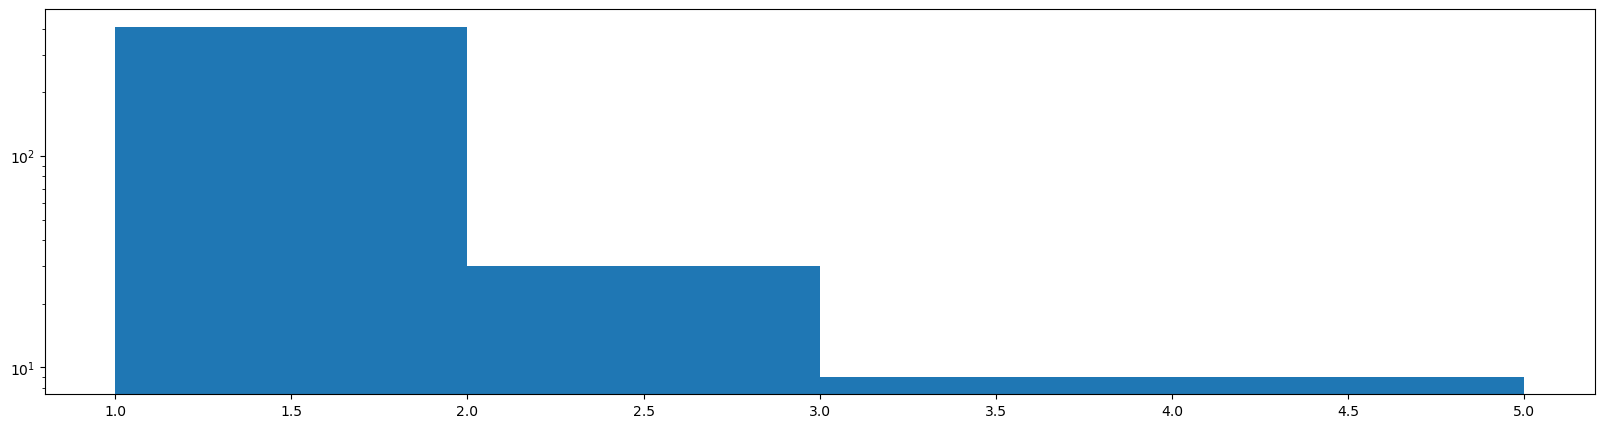

In [53]:
erdos_c = 4
p_thin = 0.95
mean_degree = erdos_c*(1-p_thin)
n = 500

A = erdos(n, mean_degree)

# Convert to a directed graph
G = nx.from_numpy_array(A, create_using=nx.DiGraph)

# Get all strongly connected components
sccs = list(nx.strongly_connected_components(G))

# Number of strongly connected components
num_sccs = len(sccs)

# Sizes of each SCC
scc_sizes = [len(scc) for scc in sccs]

print(f"Number of strongly connected components: {num_sccs}")
print(f"Sizes of SCCs: {np.unique(scc_sizes)}")

plt.hist(scc_sizes, np.unique(scc_sizes), log=True)
# plt.hist(scc_sizes, [1,2,3,4,5])
